# cccc

## What's new:

1-


In [4]:
import pandas as pd

In [5]:

# --- Parameters ---
given_time = "2024.05.03 01:00:00"   # starting datetime
n = 60                               # number of candles to extract starting from given_time
future_horizon = 10                  # how many candles after input_df to extract

In [6]:
# 1- Load Features
df = pd.read_csv('XAGUSD-197001010000--H1-rates.csv', sep='\t')
# Rename columns for easier access
df.rename(columns={
    '<DATE>': 'DATE',
    '<TIME>': 'TIME',
    '<OPEN>': 'OPEN',
    '<HIGH>': 'HIGH',
    '<LOW>': 'LOW',
    '<CLOSE>': 'CLOSE',
    '<TICKVOL>': 'TICKVOL',
    '<VOL>': 'VOL',
    '<SPREAD>': 'SPREAD'
}, inplace=True)
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])


In [4]:
# 2- Load 60 rows from a separate CSV file
input_df = pd.read_csv('datasets-29-11111/new-data-for-test/rows-60-from-20240503/rows-60-from-20240503.csv', sep='\t')

In [ ]:
import sys

sys.path.insert(1, '../utils')
import forex_plot_utils_2
import os

# PARAMETERS
csv1_path = 'datasets-29-11111/new-data-for-test/rows-60-from-20240503/latest-4-for-history.csv'
csv3_path = 'datasets-29-11111/new-data-for-test/rows-60-from-20240503/after.csv'
plot_title = 'Actual vs Predicted Forex Closing Prices'
output_plot_path = None  # e.g., 'output.png'

# LOAD DATA FROM CSVS
historical_df = forex_plot_utils_2.load_csv_with_datetime(csv1_path) if os.path.exists(csv1_path) else None
actual_future_df = forex_plot_utils_2.load_csv_with_datetime(csv3_path) if os.path.exists(csv3_path) else None


In [ ]:
input_df

In [ ]:
historical_df

In [ ]:
actual_future_df

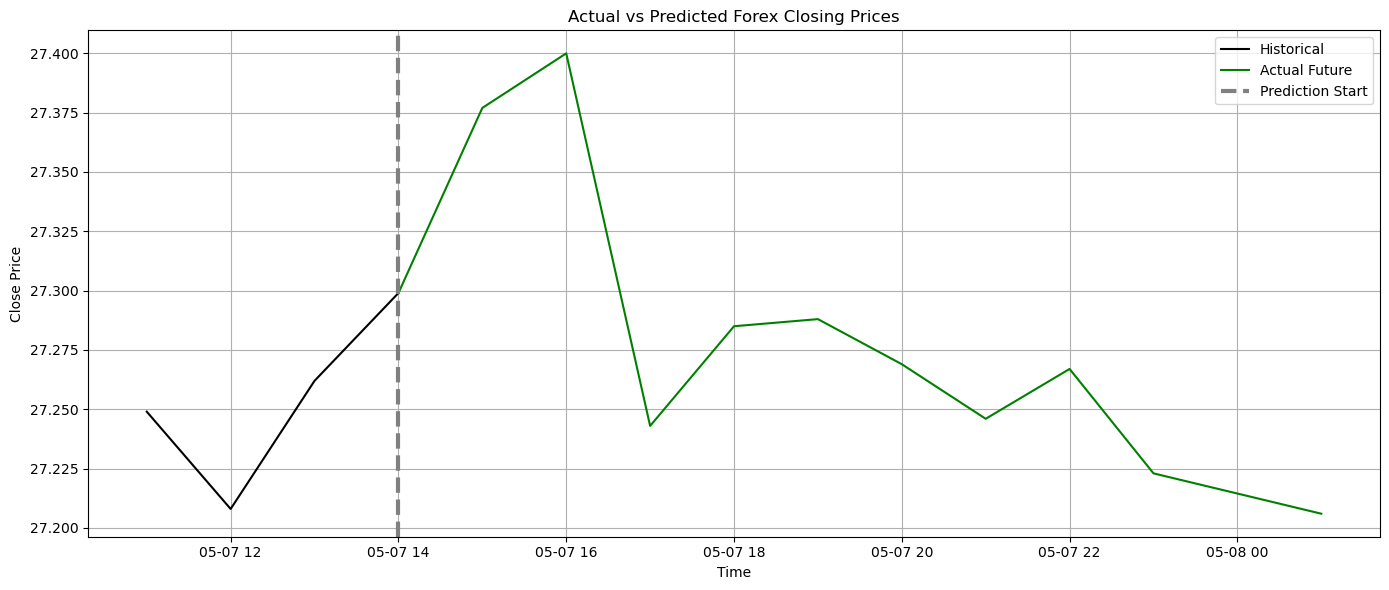

In [14]:
# PLOT
forex_plot_utils_2.plot_all_series(
    historical_df=historical_df,

    actual_future_df=actual_future_df,
    title=plot_title,
    output_path=output_plot_path
)

In [9]:
# --- Find the starting index ---
start_idx = df.index[df['DATETIME'] == pd.to_datetime(given_time)][0]

# --- 1. Extract next n candles ---
input_df_1 = df.iloc[start_idx : start_idx + n].copy()

# --- 2. Extract last 4 candles from input_df ---
historical_df_1 = input_df_1.tail(4).copy()

# --- 3. Extract next 10 candles immediately after input_df ---
actual_future_df_1 = df.iloc[start_idx + n : start_idx + n + future_horizon].copy()

plot_title = 'Actual vs Predicted Forex Closing Prices'
output_plot_path = None  # e.g., 'output.png'


In [ ]:
input_df_1

In [ ]:
historical_df_1

In [ ]:
actual_future_df_1

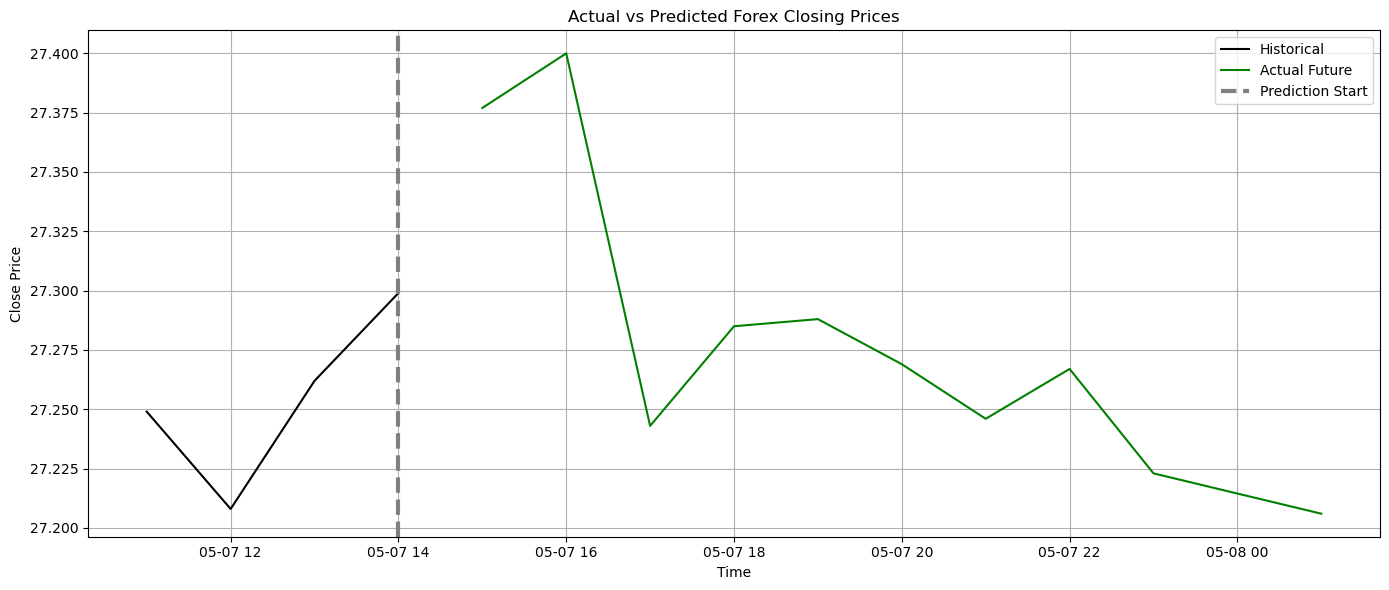

In [10]:
import sys

sys.path.insert(1, '../utils')
import forex_plot_utils_2

# PLOT
forex_plot_utils_2.plot_all_series(
    historical_df=historical_df_1,

    actual_future_df=actual_future_df_1,
    title=plot_title,
    output_path=output_plot_path
)